# 第九章图像内容分析

## 9.1简介
* 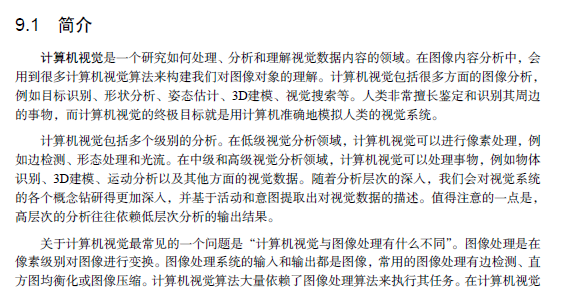

## ~
* 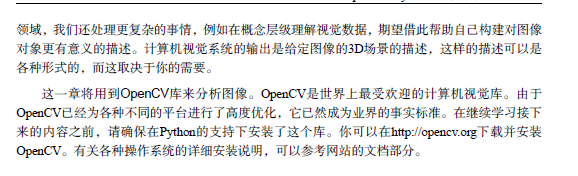


## 9.2 用OpenCV-Python操作图像

In [1]:
# 1、创建一个Python文件，并导入以下程序包
import sys
import cv2
import numpy as np

In [2]:
# 2、指定输入图像为文件的第一个参数，并使用图像读取函数来的读取参数。这个例子中用到foresrt.jpg

# 加载并显示图像forest.jpg
path='E:\\github\\Python-Machine-Learning-Cookbook\\Chapter09\\'
input_file = sys.argv[1]
img = cv2.imread(path+'forest.jpg')

In [3]:
# 3显示图像
cv2.imshow("windows_name",img)
cv2.waitKey(0)

-1

In [5]:
cv2.imshow("Original",img)
cv2.waitKey(0)

-1

In [6]:
# 现在裁剪该图像。提取输入图像的高度和宽度，然后指定边界
# 裁剪图像
h,w = img.shape[:2]
start_now,end_row = int(0.21*h),int(0.73*h)
start_col,end_col = int(0.37*w),int(0.92*w)


In [7]:
# 用Numpy式方式裁剪图像，并将其zhanshi
img_cropped = img[start_now:end_row,start_col:end_col]

cv2.imshow('Cropped',img_cropped)
cv2.waitKey(0)

-1

In [8]:
# 将图像大小调整其原始大小的1.3倍，并将其展示出来
scaling_factor = 1.3
img_scaled = cv2.resize(img,None,fx=scaling_factor,fy=scaling_factor,interpolation = cv2.INTER_LINEAR)
cv2.imshow('Uniform resizing',img_scaled)
cv2.waitKey(0)

-1

In [9]:
# 仅在一个维度进行调整
img_scaled = cv2.resize(img,(250,400),interpolation=cv2.INTER_AREA)
cv2.imshow('SKewed resizing',img_scaled)
cv2.waitKey(0)

-1

In [10]:
# 将图像保存到输出文件
output_file = input_file[:-4]+'_croped.jpg'
cv2.imwrite(output_file,img_cropped)
cv2.waitKey()

-1

## 检测边

In [ ]:
# 导入以下程序包
import sys
import cv2
import numpy as np

In [ ]:
# 加载输入图像，chair.jpg

path='E:\\github\\Python-Machine-Learning-Cookbook\\Chapter09\\'
img = cv2.imread(path+'chair.jpg',cv2.IMREAD_GRAYSCALE)

In [ ]:
# 提取输入图像的高度和宽度
h,w = img.shape[:2]
print(h,w)

In [ ]:
cv2.imshow('12',img)
cv2.waitKey()

In [6]:
# 索贝尔水平检测器
sobel_horizontal = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)

In [7]:
# 索贝尔垂直检测器
sobel_vertical = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)


In [8]:
# 拉普拉斯边检测器
laplaction = cv2.Laplacian(img,cv2.CV_64F)

### Canny边检测器
* 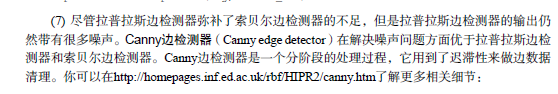

In [9]:
canny = cv2.Canny(img,50,240)

In [10]:
# 显示所有图像
cv2.imshow('Original',img)
cv2.waitKey()
cv2.imshow('Sobel horizontal',sobel_horizontal)
cv2.waitKey()
cv2.imshow('Sobel vertical',sobel_vertical)
cv2.waitKey()
cv2.imshow('Laplacian',laplaction)
cv2.waitKey()
cv2.imshow('Canny',canny)

cv2.waitKey()

-1

## 9.4直方图均衡化
* 直方图均衡化是指修改图像的像素以增强图像的对比度的过程

In [1]:
import sys 
import cv2
import numpy as np

# 加载输入图像sunrise.jpg
path='E:\\github\\Python-Machine-Learning-Cookbook\\Chapter09\\'
img = cv2.imread(path+'sunrise.jpg')

cv2.imshow('img',img)
cv2.waitKey(0)

-1

In [2]:
# 将图像转化为灰度并将其显示出来 
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('Input Grayscale image',img_gray)
cv2.waitKey(0)

-1

In [3]:
# 均衡直方图
img_gray_histeq = cv2.equalizeHist(img_gray)
cv2.imshow('Histogram equalized-grayscale',img_gray_histeq)
cv2.waitKey(0)

-1

### 均衡色彩图像的直方图
* 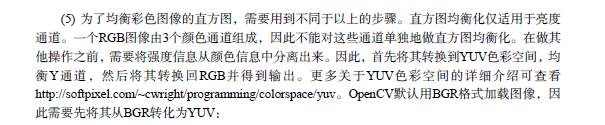

In [4]:
# 均衡色彩图像的直方图
img_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
# 均衡Y通道
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
# 将其转换会BGR
img_histeq = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)
# 显示输入输出图像
cv2.imshow('Input img',img)
cv2.waitKey(0)
cv2.imshow('Histogram equalized-color',img_histeq)
cv2.waitKey(0)

-1

## 9.2检测棱角
* 棱角检测是计算机视觉中的一个重要环节，他帮助我们识别图像中突出的点。

In [4]:
import cv2
import numpy as np

path = 'E:\\github\\Python-Machine-Learning-Cookbook\\Chapter09\\'
# 加载box.png
img = cv2.imread(path+'box.png')
cv2.imshow('Input image',img)
cv2.waitKey(0)

# 将图像转化为灰度，并将其强制转换为浮点值。浮点值用于棱角检测过程
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img_gray)
# 对灰度图像进行哈里斯角的检测器函数
img_harris = cv2.cornerHarris(img_gray,7,5,0.04)
# 为了标记棱角，放大图像
img_harris = cv2.dilate(img_harris,None)
# 用阈值显示棱角
img[img_harris > 0.01 * img_harris.max()]=[0,0,0]
# 显示输出图像
cv2.imshow('Harris Corners',img)
cv2.waitKey(0)

-1

## 9.6检测SIFT特征点
* 尺寸不变特征变换（Scale Invariant Featureform , SIFT）是计算机视觉领域最常用的特征之一
* David Lowe 首次在其论文中提出该特征
* 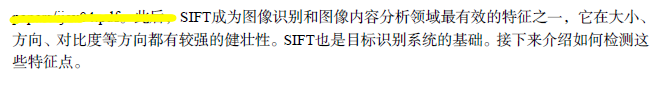

In [ ]:
import cv2
import numpy as np


path = 'E:\\github\\Python-Machine-Learning-Cookbook\\Chapter09\\'
img = cv2.imread(path+'table.jpg')
# 将图像转为灰度
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# 初始化SIFT检测器对象并提取关键点
sift = cv2.xfeatures2d.SIFT_create()# 该算法不可用
keypoints = sift.detect(img_gray,None)

# 在输出图像上画出关键点
img_sift = np.copy(img)
cv2.drawKeypoints(img,keypoints,img_sift,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('Input Image',img)
cv2.waitKey(0)
cv2.imshow('SIFT features',img_sift)
cv2.waitKey(0)

## 创建Star特征检测器
* 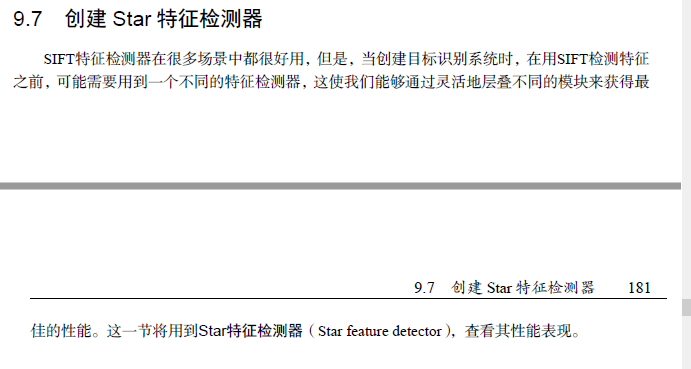

In [ ]:
import cv2
import numpy as np

# 定义一个类，用于处理与Star特征检测相关的函数
class StarFeatureDetector(object):
    def __init__(self):
        self.detector = cv2.xfeatures2d.StarDetector_create()
    # 定义一个对输入图像运行检测器的函数
    def detect(self,img):
        return self.detector.detect(img)
    # 在main函数中加载输入图像

if __name__=='__main__':
    path = 'E:\\github\\Python-Machine-Learning-Cookbook\\Chapter09\\'
    input_img = cv2.imread(path+'table.jpg')
    # 转成灰度图
    img_gray = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
    # 用Star特征检测器检测出特征
    keypoints = StarFeatureDetector().detect(input_img)
    # 画出输入图像的关键点
    cv2.drawKeypoints(input_img,keypoints,input_img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # 显示图像
    cv2.imshow('Star features',input_img)
    cv2.waitKey(0)

In [ ]:
import cv2

## 9.8利用视觉码本和向量量化创建特征
* 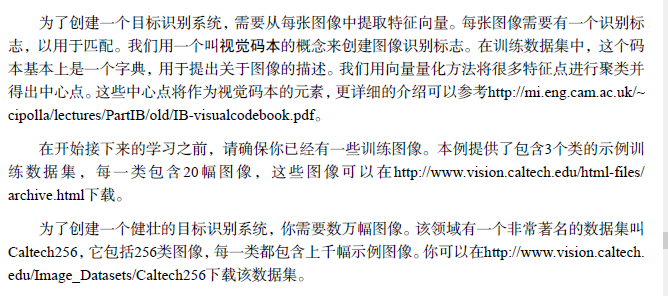

In [2]:
# 定义一个提取特征的类
class FeatureBuilder(object):
    # 从输入图像提取特征的方法。下面用Star检测器获取关键点，然后用SIFT提取这些位置的描述信息
    def extract_features(self,img):
        keypoints = StarFeatureDetector().detect(img)
        keypoints,feature_vectors = compute_sift_features(img,keypoints)
        return feature_vectors
    # 从描述信息中提取中心点
    def get_codewords(self,input_map,scaling_size,max_samples=12):
        keypoints_all = []
        
        count = 0
        cur_class = ''
        # 每幅图片都会生成大量的描述信息。
        for item in input_map:
            if count >= max_samples:
                if cur_class != item['object_class']:
                    count = 0
            else:
                 continue
        count+=1
        # 将进程打印出来
        if count == max_samples:
            print("Built centroids for",item['object_class'])
        # 提取当前标签
        cur_class = item['object_class']
        # 读取图像并调整其大小
        img = cv2.imread(item['image_path'])
        img = resize_image(img,scaling_size)
        # 设置维度数为128并提取特征：
        num_dims = 128
        feature_vectors = self.extract_features(img)
        keypoints_all.extend(feature_vectors)
        # 用向量量化来量化特征点
        kmeans,centroids = BagOfWords().cluster(keypoints_all)
        return kmeans,centroids

# 定义一个类来处理词袋模型和向量量化
class BagOfWords(object):
    def __init__(self,num_clusters=32):
        self.num_dims = 128
        self.num_clusters = num_clusters
        self.num_retries = 10
    # 定义一个方法来量化数据点（用k-means聚类来实现）
    def cluster(self,datapoints):
        kmeans = KMeans(self.num_clusters,n_init=max(self.num_retries,1),max_iter=10,tol=1.0)
        # 提取中心点
        res = kmeans.fit(datapoints)
        centroids = res.cluster_centers_
        return kmeans,centroids
    
    # 定义一个方法来归一化数据
    def normalize(self,input_data):
        sum_input = np.sum(input_data)
        
        if sum_input > 0:
            return input_data/sum_input
        else:
            return input_data
    # 定义一个方法来获得特征向量
    def construct_feature(self,img,kmeans,centroids):
        keypoints = StarFeatureDetector().detect(img)
        keypoints,feature_vectors = compute_sift_features(img,keypoints)
        labels = kmeans.predict(feature_vectors)
        feature_vector = np.zeros(self.num_clusters)
        # 创建一个直方图并将其归一化
        for i,item in enumerate(feature_vectors):
            feature_vector[labels[i]]+=1
            
            feature_vector_img = np.reshape(feature_vector,((1,feature_vector[0])))
            return self.normalize(feature_vector_img)
        
    # 定义一个方法提取SIFT特征
    def compute_sift_features(img,keypoints):
        if img is None:
            raise TypeError('Invalid input image')
        
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        keypoints,descriptors = cv2.xfeatures2d.SIFT_create().compute(img_gray,keypoints)
        return keypoints,descriptors

## 9.9用极端随机森林训练图像分类器
* 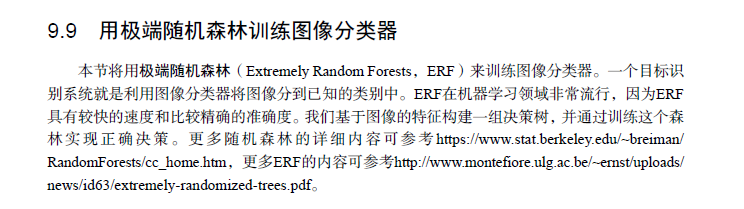

In [9]:
import argparse
import pickle

import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing

In [10]:
# 定义一个参数解析器
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Train the classifier')
    parser.add_argument('--feature-map-file',dest="feature_map_file",required=True,help = "Input pickle file containing the feature map")
    parser.add_argument("--model-file",dest="model_file",required=False,help="Out file where the trained model will be stored")
    return parser

In [11]:
# 定义一个类处理ERF训练，这里将用到一个标签编码器来对训练标签进行编码
class ERFTrainer(object):
    def __init__(self,X,label_words):
        self.le = preprocessing.LabelEncoder()
        self.clf = ExtraTreesClassifier(n_estimators=100,max_depth=16,random_state=0)
        # 对标签编码并训练分类器
        y = self.encode_labels(label_words)
        self.clf.fit(np.asarray(X),y)
    
    # 定义一个函数，用于对标签进行编码
    def encode_labels(self,label_words):
        self.le.fit(label_words)
        return np.array(self.le.transform(label_words),dtype=np.float32)
    
    # 定义一个函数，用于对未知数据点进行分类
    def classify(self,X):
        label_nums = self.clf.predict(np.asarray(X))
        label_words = self.le.inverse_transform([int(x) for x in label_nums ])
        return label_words
    
if __name__ == '__main__':
    args = build_arg_parser().parse_args()
    feature_map_file = args.feature_map_file
    model_file = args.model_file
    
    # 加载特征地图
    with open(feature_map_file,'r') as f:
        feature_map = pickle.load(f)
        
    # 提取特征向量和标记
    label_words = [x['object_class'] for x in feature_map]
    dim_size = feature_map[0]['feature_vector'].shape[1]
    X = [np.reshape(x['feature_vector'],(dim_size,))for x in feature_map]
    
    # 基于训练数据训练ERF:
    erf = ERFTrainer(X,label_words)
    
    # 保存训练模型
    if args.model_file:
        with open(args.model_file,'w') as f:
            pickle.dump(erf,f)
              

usage: ipykernel_launcher.py [-h] --feature-map-file FEATURE_MAP_FILE
                             [--model-file MODEL_FILE]
ipykernel_launcher.py: error: the following arguments are required: --feature-map-file


SystemExit: 2

C:\Users\流痕~\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
